# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Josua Sianturi
- **Email:** mc281d5y1293@student.devacademy.id
- **ID Dicoding:** MC281D5Y1293

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1. Pada saat jam berapa terjadi penyewaan sepeda yang paling banyak dan paling sedikit?
- Pertanyaan 2. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Pertanyaan 3. Bagaimana pola penyewaan sepeda pada hari kerja dibandingkan akhir pekan?
- Pertanyaan 4. Bagaimana pola penyewaan sepeda berdasarkan musim?
- Pertanyaan 5. Bagaimana perbedaan pola penggunaan antara penyewa terdaftar dan penyewa kasual sepanjang tahun?
- Pertanyaan 6. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

## Memanggil library 

In [1]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Menghasilkan sebuah DataFrame bernama day_df dan menampilkan lima baris pertama dari DataFrame tersebut.Tabel day menyimpan berbagai informasi terkait penyewaan sepeda harian, termasuk ID unik (instant), tanggal (dteday), musim (season), tahun (yr), bulan (mnth), hari libur (holiday), hari dalam seminggu (weekday), status hari kerja (workingday), kondisi cuaca (weathersit), suhu (temp), suhu yang dirasakan (atemp), kelembaban (hum), kecepatan angin (windspeed), jumlah penyewa kasual (casual), jumlah penyewa terdaftar (registered), dan total penyewaan sepeda (cnt).

In [3]:
# Memuat tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Menghasilkan sebuah DataFrame bernama hour_df dan menampilkan lima baris pertama dari DataFrame tersebut. Tabel hour menyimpan berbagai informasi terkait penyewaan sepeda per jam, termasuk ID unik (instant), tanggal (dteday), musim (season), tahun (yr), bulan (mnth), jam (hr), hari libur (holiday), hari dalam seminggu (weekday), status hari kerja (workingday), kondisi cuaca (weathersit), suhu (temp), suhu yang dirasakan (atemp), kelembaban (hum), kecepatan angin (windspeed), jumlah penyewa kasual (casual), jumlah penyewa terdaftar (registered), dan total penyewaan sepeda (cnt).

**insight tambahan:**
kolom instant dapat kita hapus karena untuk analisis ini tidak diperlukan(hanya sebagai indeks saja), dan ini dapat membuat data kita menjadi beragam yang membuat cek duplicate tidak berfungsi

In [4]:
# Menghapus kolom "instant" pada masing-masing tabel karena tidak berguna (hanya sebagai indeks)
day_df.drop(["instant"], axis=1, inplace=True) 
hour_df.drop(["instant"], axis=1, inplace=True)

### Assessing Data

#### Menilai Data day_df.

In [5]:
# memeriksa tipe data pada tabel  day_df.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


**Insight:**
Terdapat kesalahan tipe data untuk kolom dteday, kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). Selain itu Terdapat kesalahan tipe data untuk kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit, kolom tersebut harusnya direpresentasikan sebagai tipe data kategori bukan integer.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada tabel day_df. 

#### Menilai Data hour_df.

In [8]:
# memeriksa tipe data pada tabel hour_df.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


**Insight:**
Terdapat kesalahan tipe data untuk kolom dteday, kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). Selain itu Terdapat kesalahan tipe data untuk kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit, kolom tersebut harusnya direpresentasikan sebagai tipe data kategori bukan integer.

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada tabel hour_df. 

### Cleaning Data

##### mengganti nama kolom pada tabel day

In [11]:
day_df.rename(columns={
    'dteday': 'tanggal',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'holiday': 'hari_libur',
    'weekday': 'hari',
    'workingday': 'status_hari_kerja',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'atemp': 'suhu_yang_dirasakan',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'casual': 'penyewa_kasual',
    'registered': 'penyewa_terdaftar',
    'cnt': 'total_penyewaan_sepeda'
}, inplace=True)
day_df.columns

Index(['tanggal', 'musim', 'tahun', 'bulan', 'hari_libur', 'hari',
       'status_hari_kerja', 'cuaca', 'suhu', 'suhu_yang_dirasakan',
       'kelembaban', 'kecepatan_angin', 'penyewa_kasual', 'penyewa_terdaftar',
       'total_penyewaan_sepeda'],
      dtype='object')

##### Menghapus kolom yang tidak penting

In [12]:
day_df.drop(columns=['suhu_yang_dirasakan', 'tahun', 'hari_libur'], inplace=True)
day_df.columns

Index(['tanggal', 'musim', 'bulan', 'hari', 'status_hari_kerja', 'cuaca',
       'suhu', 'kelembaban', 'kecepatan_angin', 'penyewa_kasual',
       'penyewa_terdaftar', 'total_penyewaan_sepeda'],
      dtype='object')

**Insight:**
Beberapa kolom tersebut memiliki kesamaan informasi dengan kolom lainnya dan tidak diperlukan lagi dan dapat dihapus untuk menyederhanakan dataset

##### mengganti nama kolom pada tabel hour

In [13]:
hour_df.rename(columns={
    'dteday': 'tanggal',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'hr': 'jam',
    'holiday': 'hari_libur',
    'weekday': 'hari',
    'workingday': 'status_hari_kerja',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'atemp': 'suhu_yang_dirasakan',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'casual': 'penyewa_kasual',
    'registered': 'penyewa_terdaftar',
    'cnt': 'total_penyewaan_sepeda'
}, inplace=True)
hour_df.columns

Index(['tanggal', 'musim', 'tahun', 'bulan', 'jam', 'hari_libur', 'hari',
       'status_hari_kerja', 'cuaca', 'suhu', 'suhu_yang_dirasakan',
       'kelembaban', 'kecepatan_angin', 'penyewa_kasual', 'penyewa_terdaftar',
       'total_penyewaan_sepeda'],
      dtype='object')

##### Menghapus kolom yang tidak penting

In [14]:
hour_df.drop(columns=['suhu_yang_dirasakan', 'tahun', 'hari_libur'], inplace=True)
hour_df.columns

Index(['tanggal', 'musim', 'bulan', 'jam', 'hari', 'status_hari_kerja',
       'cuaca', 'suhu', 'kelembaban', 'kecepatan_angin', 'penyewa_kasual',
       'penyewa_terdaftar', 'total_penyewaan_sepeda'],
      dtype='object')

##### mengubah tipe data

In [15]:
# ubah tipe data dteday ke format datetime 
day_df["tanggal"] = pd.to_datetime(day_df["tanggal"])
hour_df["tanggal"] = pd.to_datetime(hour_df["tanggal"])

In [16]:
# Membuat nilai kategori
musim_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
cuaca_mapping = {1: "Cerah/Sedikit Berawan", 2: "Berkabut/Berawan", 3: "Salju Ringan/Hujan Ringan", 4: "Hujan Lebat/Salju/Lembab"}
hari_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
bulan_mapping = {1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"}
status_kerja_mapping = {0: "Akhir Pekan", 1: "Hari Kerja"}

# Konversi nilai kategori pada day_df
day_df['musim'] = day_df['musim'].map(musim_mapping).astype('category')
day_df['cuaca'] = day_df['cuaca'].map(cuaca_mapping).astype('category')
day_df['hari'] = day_df['hari'].map(hari_mapping).astype('category')
day_df['bulan'] = day_df['bulan'].map(bulan_mapping).astype('category')
day_df['status_hari_kerja'] = day_df['status_hari_kerja'].map(status_kerja_mapping).astype('category')

# Konversi nilai kategori pada hour_df
hour_df['musim'] = hour_df['musim'].map(musim_mapping).astype('category')
hour_df['cuaca'] = hour_df['cuaca'].map(cuaca_mapping).astype('category')
hour_df['hari'] = hour_df['hari'].map(hari_mapping).astype('category')
hour_df['bulan'] = hour_df['bulan'].map(bulan_mapping).astype('category')
hour_df['status_hari_kerja'] = hour_df['status_hari_kerja'].map(status_kerja_mapping).astype('category')

In [17]:
# menyimpan dataset yang sudah dibersihkan
day_df.to_csv("day_cleaned.csv", index=False)
hour_df.to_csv("hour_cleaned.csv", index=False)

In [18]:
days_df = pd.read_csv("day_cleaned.csv")
days_df.head()

,tanggal,musim,bulan,hari,status_hari_kerja,cuaca,suhu,kelembaban,kecepatan_angin,penyewa_kasual,penyewa_terdaftar,total_penyewaan_sepeda
0,2011-01-01,Musim Semi,Januari,Sabtu,Akhir Pekan,Berkabut/Berawan,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Musim Semi,Januari,Minggu,Akhir Pekan,Berkabut/Berawan,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Musim Semi,Januari,Senin,Hari Kerja,Cerah/Sedikit Berawan,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Musim Semi,Januari,Selasa,Hari Kerja,Cerah/Sedikit Berawan,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Musim Semi,Januari,Rabu,Hari Kerja,Cerah/Sedikit Berawan,0.226957,0.436957,0.186900,82,1518,1600


In [19]:
hours_df = pd.read_csv("hour_cleaned.csv")
hours_df.head()

,tanggal,musim,bulan,jam,hari,status_hari_kerja,cuaca,suhu,kelembaban,kecepatan_angin,penyewa_kasual,penyewa_terdaftar,total_penyewaan_sepeda
0,2011-01-01,Musim Semi,Januari,0,Sabtu,Akhir Pekan,Cerah/Sedikit Berawan,0.24,0.81,0.0,3,13,16
1,2011-01-01,Musim Semi,Januari,1,Sabtu,Akhir Pekan,Cerah/Sedikit Berawan,0.22,0.80,0.0,8,32,40
2,2011-01-01,Musim Semi,Januari,2,Sabtu,Akhir Pekan,Cerah/Sedikit Berawan,0.22,0.80,0.0,5,27,32
3,2011-01-01,Musim Semi,Januari,3,Sabtu,Akhir Pekan,Cerah/Sedikit Berawan,0.24,0.75,0.0,3,10,13
4,2011-01-01,Musim Semi,Januari,4,Sabtu,Akhir Pekan,Cerah/Sedikit Berawan,0.24,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [20]:
days_df["tanggal"] = pd.to_datetime(days_df["tanggal"])

In [21]:
# melihat rangkuman parameter statistik dari data hour_df 
days_df.describe(include="all")

,tanggal,musim,bulan,hari,status_hari_kerja,cuaca,suhu,kelembaban,kecepatan_angin,penyewa_kasual,penyewa_terdaftar,total_penyewaan_sepeda
count,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Musim Gugur,Januari,Sabtu,Hari Kerja,Cerah/Sedikit Berawan,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Berdasarkan rangkuman statistik penyewaan sepeda harian di atas, dataset berisi 731 data dengan distribusi penyewa sepeda yang bervariasi, di mana jumlah penyewa kasual rata-rata 848 dan penyewa terdaftar 3.656 serta dipengaruhi oleh faktor cuaca, suhu rata-rata 0,495, kelembaban 0,627, dan kecepatan angin 0,19.

In [33]:
# melihat jumlah penyewaan tiap musim berdasarkan penyewa terdaftar dan penyewa kasual
days_df.groupby(by="musim").agg({
    "penyewa_terdaftar": ["sum"],
    "penyewa_kasual": ["sum"]
})

,penyewa_terdaftar,penyewa_kasual
,sum,sum
musim,,
Musim Dingin,711831,129782
Musim Gugur,835038,226091
Musim Panas,715067,203522
Musim Semi,410726,60622


In [34]:
# melihat jumlah penyewaan tiap hari berdasarkan penyewa terdaftar dan penyewa kasual
days_df.groupby(by="hari").agg({
    "penyewa_terdaftar": ["sum"],
    "penyewa_kasual": ["sum"]
})

,penyewa_terdaftar,penyewa_kasual
,sum,sum
hari,,
Jumat,409552,78238
Kamis,423935,61460
Minggu,303506,140521
Rabu,415729,57319
Sabtu,323955,153852
Selasa,411266,57843
Senin,384719,70784


### Eksplorasi Data hour_df

In [69]:
hours_df["tanggal"] = pd.to_datetime(hours_df["tanggal"])

In [70]:
# melihat rangkuman parameter statistik dari data hour_df 
hours_df.describe(include="all")

,tanggal,musim,bulan,jam,hari,status_hari_kerja,cuaca,suhu,kelembaban,kecepatan_angin,...,penyewa_terdaftar,total_penyewaan_sepeda,kategori_jam,demand_category,kategori_musim,penyewa_category,suhu_category,kelembaban_category,angin_category,kategori_waktu
count,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379,17379,17379,17348,17379,17379,731,17379
unique,NaN,4,12,NaN,7,2,4,NaN,NaN,NaN,...,NaN,NaN,3,3,2,3,3,3,3,3
top,NaN,Musim Gugur,Mei,NaN,Sabtu,Hari Kerja,Cerah/Sedikit Berawan,NaN,NaN,NaN,...,NaN,NaN,Jam Sepi,Permintaan Tinggi,Musim Dingin,Penyewa Tinggi,Hot,Medium Humidity,Medium Wind,Jam Sepi
freq,NaN,4496,1488,NaN,2512,11865,11413,NaN,NaN,NaN,...,NaN,NaN,7913,5904,8728,7380,5835,5885,334,7916
mean,2012-01-02 04:08:34.552045568,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.627229,0.190098,...,153.786869,189.463088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2011-07-04 00:00:00,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.480000,0.104500,...,34.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012-01-02 00:00:00,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.630000,0.194000,...,115.000000,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2012-07-02 00:00:00,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.780000,0.253700,...,220.000000,281.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,0.850700,...,886.000000,977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
Berdasarkan rangkuman statistik di atas, dataset berisi 17.379 data dengan distribusi penyewa sepeda yang bervariasi, di mana jumlah penyewa kasual rata-rata 35 dan penyewa terdaftar 153 serta dipengaruhi oleh faktor cuaca, suhu rata-rata 0,497, kelembaban 0,627, dan kecepatan angin 0,19, dengan puncak penyewaan terjadi pada musim gugur dan bulan Mei.

In [71]:
# melihat jumlah penyewaan tiap musim berdasarkan penyewa terdaftar dan penyewa kasual
hours_df.groupby(by="musim").agg({
    "penyewa_terdaftar": ["sum"],
    "penyewa_kasual": ["sum"]
})

,penyewa_terdaftar,penyewa_kasual
,sum,sum
musim,,
Musim Dingin,711831,129782
Musim Gugur,835038,226091
Musim Panas,715067,203522
Musim Semi,410726,60622


In [73]:
hours_df.groupby(by="jam").agg({
    "total_penyewaan_sepeda": ["sum"]
}).sort_values(by=("total_penyewaan_sepeda", "sum"), ascending=False)


,total_penyewaan_sepeda
,sum
jam,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149


Berdasarkan pivot table di atas, dapat dilihat bahwa pelanggan yang menyewa sepeda paling banyak terjadi pada jam 17 dengan total 336860 orang sedangkan penyewaan sepeda yang paling sedikit terjadi pada jam 4 dini hari dengan total 4428 orang.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Pada saat jam berapa terjadi penyewaan sepeda paling banyak dan paling sedikit?

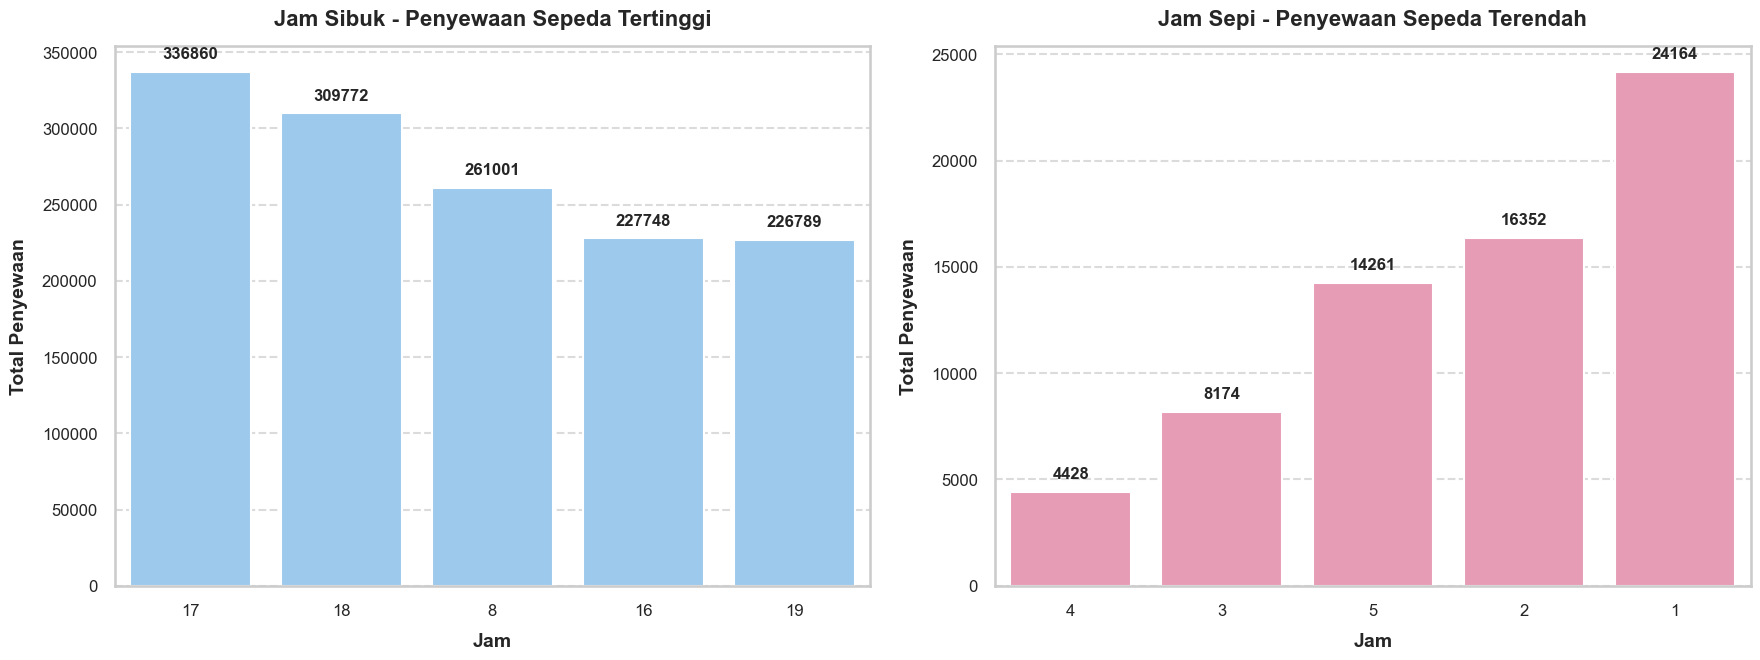

In [143]:
# Pertanyaan 1:Pada saat jam berapa penyewaan sepeda paling banyak dan paling sedikit?
# Mengurutkan DataFrame sehingga jam dengan penyewaan tertinggi muncul pertama
top_busy_hours_sorted = top_busy_hours.sort_values(by="total_penyewaan_sepeda", ascending=False)
order_busy = top_busy_hours_sorted["jam"].tolist()

# Untuk jam sepi, urutan dari yang terendah ke tertinggi
least_busy_hours_sorted = least_busy_hours.sort_values(by="total_penyewaan_sepeda", ascending=True)
order_quiet = least_busy_hours_sorted["jam"].tolist()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Palet warna disesuaikan dengan jumlah bar
busy_palette = ["#90CAF9"] * len(top_busy_hours_sorted)
quiet_palette = ["#F48FB1"] * len(least_busy_hours_sorted)

# Barplot untuk jam sibuk dengan urutan yang sudah ditentukan
sns.barplot(x="jam", y="total_penyewaan_sepeda", 
            data=top_busy_hours_sorted, 
            palette=busy_palette, 
            order=order_busy, 
            ax=ax[0])
ax[0].set_xlabel("Jam", fontsize=14, fontweight='bold', labelpad=10)
ax[0].set_ylabel("Total Penyewaan", fontsize=14, fontweight='bold', labelpad=10)
ax[0].set_title("Jam Sibuk - Penyewaan Sepeda Tertinggi", fontsize=16, fontweight='bold', pad=15)
ax[0].tick_params(axis='both', labelsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi angka dengan posisi yang tepat menggunakan properti patch
for bar in ax[0].patches:
    x = bar.get_x() + bar.get_width() / 2.0  # posisi tengah bar
    y = bar.get_height()
    offset = max(top_busy_hours_sorted["total_penyewaan_sepeda"]) * 0.02  
    ax[0].text(x, y + offset, f'{int(y)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Barplot untuk jam sepi dengan urutan yang sudah ditentukan
sns.barplot(x="jam", y="total_penyewaan_sepeda", 
            data=least_busy_hours_sorted, 
            palette=quiet_palette, 
            order=order_quiet, 
            ax=ax[1])
ax[1].set_xlabel("Jam", fontsize=14, fontweight='bold', labelpad=10)
ax[1].set_ylabel("Total Penyewaan", fontsize=14, fontweight='bold', labelpad=10)
ax[1].set_title("Jam Sepi - Penyewaan Sepeda Terendah", fontsize=16, fontweight='bold', pad=15)
ax[1].tick_params(axis='both', labelsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi angka pada barplot jam sepi
for bar in ax[1].patches:
    x = bar.get_x() + bar.get_width() / 2.0
    y = bar.get_height()
    offset = max(least_busy_hours_sorted["total_penyewaan_sepeda"]) * 0.02  
    ax[1].text(x, y + offset, f'{int(y)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Disini kita dapat melihat bahwa Puncak penyewaan sepeda dengan range 5 teratas terjadi pada pukul 17, 18, 8, 16, dan 19 kemungkinan karena aktivitas berangkat dan pulang kerja. Sementara itu penyewaan sepeda terendah dengan range 5 teratas ada pada saat dini hari yakni pukul 4, 3, 5, 2, dan 1.

#### Pertanyaan 2. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

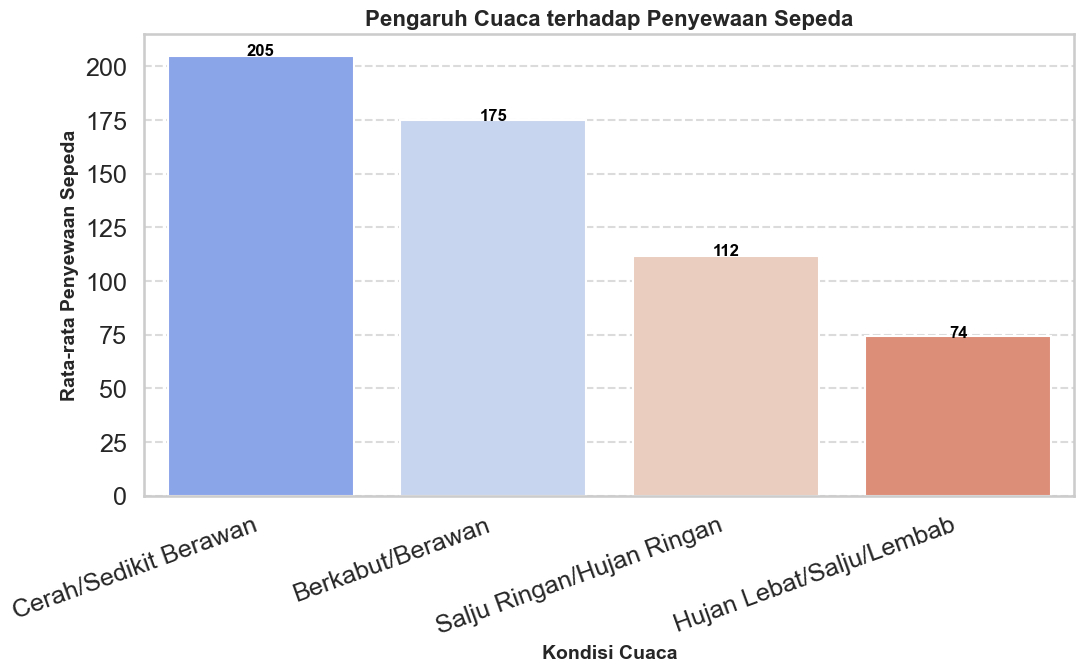

In [144]:
#Pertanyaan 2. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
plt.figure(figsize=(12, 6))
sns.barplot(x="cuaca", y="total_penyewaan_sepeda", data=weather_rentals, palette="coolwarm")

# Menambahkan anotasi nilai di atas setiap bar
for index, row in weather_rentals.iterrows():
    plt.text(index, round(row["total_penyewaan_sepeda"]), str(int(round(row["total_penyewaan_sepeda"]))),
             color='black', ha="center", fontsize=12, fontweight='bold')

# Mengatur label dan judul
plt.xlabel("Kondisi Cuaca", fontsize=14, fontweight='bold')
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=14, fontweight='bold')
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=16, fontweight='bold')
plt.xticks(rotation=20, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


Penyewaan tertinggi terjadi saat cerah atau sedikit berawan, Penyewaan menurun saat berkabut atau berawan serta Penyewaan paling rendah saat kondisi cuaca hujan atau salju.

#### Pertanyaan 3. Bagaimana pola penyewaan sepeda pada hari kerja dibandingkan akhir pekan?

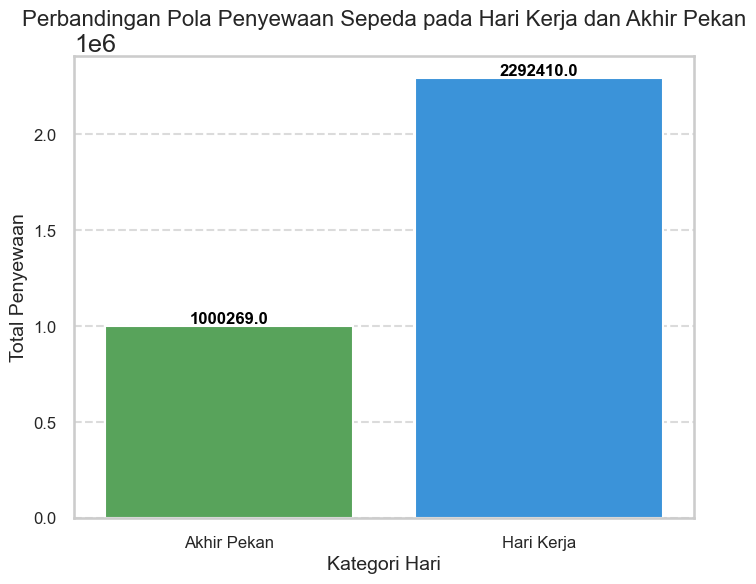

In [182]:
# Pertanyaan 3. Bagaimana pola penyewaan sepeda pada hari kerja dibandingkan akhir pekan?
# Menghitung total penyewaan sepeda pada hari kerja dan akhir pekan
rental_by_day = days_df.groupby("hari_kategori")["total_penyewaan_sepeda"].sum().reset_index()

# Membulatkan angka penyewaan
rental_by_day["total_penyewaan_sepeda"] = rental_by_day["total_penyewaan_sepeda"].round().astype(int)

# Membuat visualisasi yang lebih rapi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="hari_kategori", y="total_penyewaan_sepeda", data=rental_by_day, palette=["#4CAF50", "#2196F3"])

# Menambahkan anotasi agar angka terlihat rapi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Menyesuaikan tampilan
plt.xlabel("Kategori Hari", fontsize=14)
plt.ylabel("Total Penyewaan", fontsize=14)
plt.title("Perbandingan Pola Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan pola penggunaan yang menunjukkan bahwa sepeda sering digunakan untuk keperluan transportasi rutin pada hari kerja, sedangkan pada akhir pekan lebih bersifat fleksibel dan rekreasional. 

#### Pertanyaan 4. Bagaimana pola penyewaan sepeda berdasarkan musim?

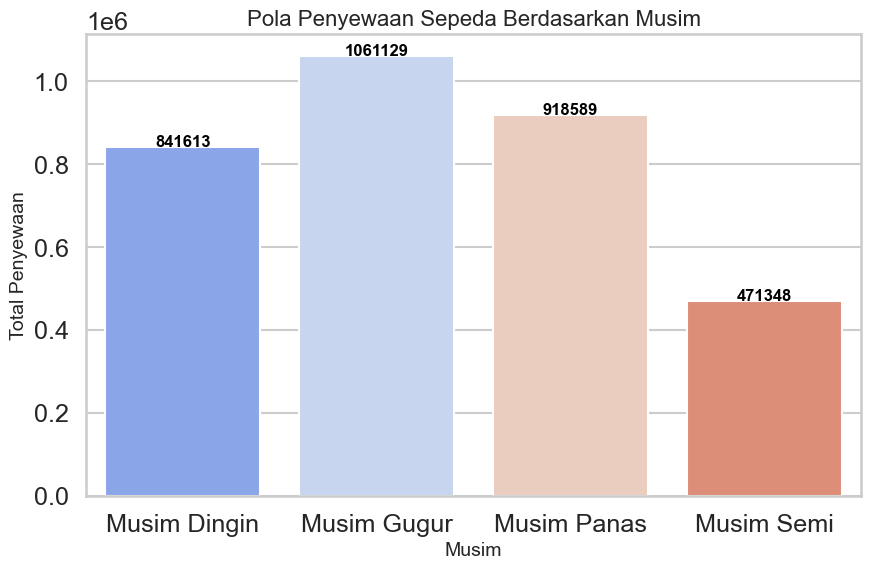

In [183]:
# Pertanyaan 4. Bagaimana pola penyewaan sepeda berdasarkan musim?# Mengelompokkan data berdasarkan musim 
season_rentals = days_df.groupby("musim")["total_penyewaan_sepeda"].sum().round().reset_index()

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="musim", y="total_penyewaan_sepeda", data=season_rentals, palette="coolwarm")

# Menambahkan anotasi jumlah penyewaan pada setiap batang
for index, row in season_rentals.iterrows():
    plt.text(index, row["total_penyewaan_sepeda"] + 500, int(row["total_penyewaan_sepeda"]), 
             color='black', ha="center", fontsize=12, fontweight='bold')

# Mengatur label dan judul
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Total Penyewaan", fontsize=14)
plt.title("Pola Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()


Penyewaan sepeda paling banyak terjadi pada saat musim gugur, sementara pada saat musim semi menjadi penyewaan sepeda paling sedikit dibandingkan dengan musim lainnya

#### Pertanyaan 5. Bagaimana perbedaan pola penggunaan antara penyewa terdaftar dan penyewa kasual sepanjang tahun?

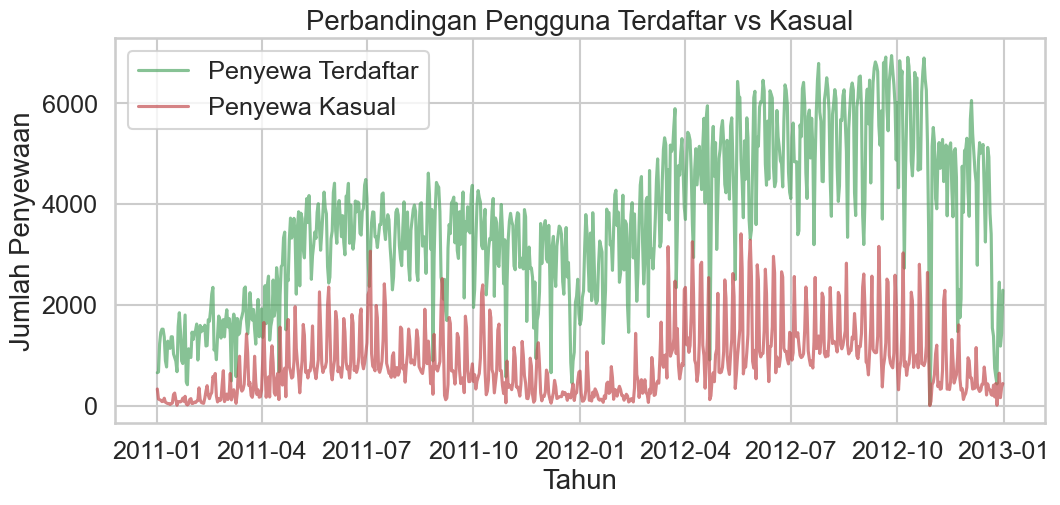

In [174]:
# Pertanyaan 5. Bagaimana perbedaan pola penggunaan antara penyewa terdaftar dan penyewa kasual sepanjang tahun?¶
# Plot perbandingan pengguna registered vs casual
plt.figure(figsize=(12, 5))
plt.plot(days_df['tanggal'], days_df['penyewa_terdaftar'], label="Penyewa Terdaftar", color='g', alpha=0.7)
plt.plot(days_df['tanggal'], days_df['penyewa_kasual'], label="Penyewa Kasual", color='r', alpha=0.7)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.title("Perbandingan Pengguna Terdaftar vs Kasual")
plt.legend()
plt.grid(True)
plt.show()

Penyewa terdaftar memiliki pola penggunaan yang lebih stabil sepanjang tahun, sedangkan penyewa kasual menunjukkan fluktuasi musiman dengan peningkatan signifikan selama bulan-bulan tertentu.

#### Pertanyaan 6. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

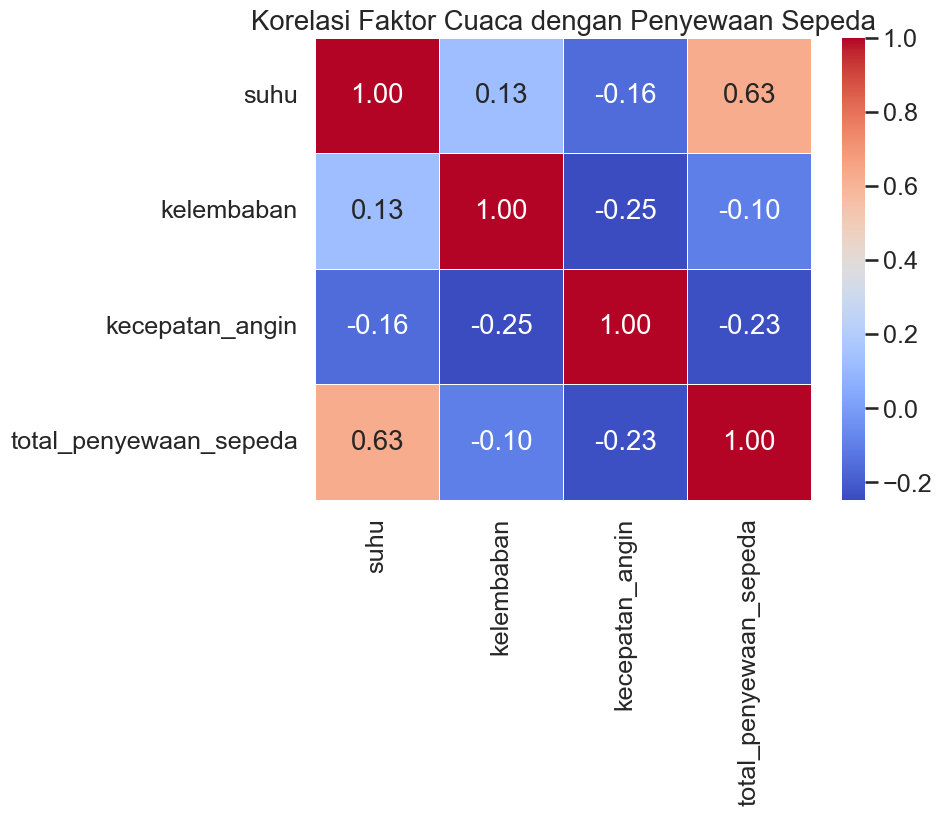

,suhu,kelembaban,kecepatan_angin,total_penyewaan_sepeda
suhu,1.000000,0.126963,-0.157944,0.627494
kelembaban,0.126963,1.000000,-0.248489,-0.100659
kecepatan_angin,-0.157944,-0.248489,1.000000,-0.234545
total_penyewaan_sepeda,0.627494,-0.100659,-0.234545,1.000000


In [177]:
# Menghitung korelasi antara faktor cuaca dan penyewaan sepeda
correlation_matrix = days_df[["suhu", "kelembaban", "kecepatan_angin", "total_penyewaan_sepeda"]].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Faktor Cuaca dengan Penyewaan Sepeda")

# Menampilkan plot
plt.show()

# Menampilkan matriks korelasi sebagai output numerik
correlation_matrix


Suhu memiliki korelasi positif terhadap penyewaan (semakin tinggi suhu, semakin banyak penyewaan).
Kelembaban memiliki korelasi negatif (kelembaban tinggi menyebabkan penyewaan menurun).
Kecepatan angin tidak memiliki dampak yang signifikan.

#### Analisis Clustering dengan ML

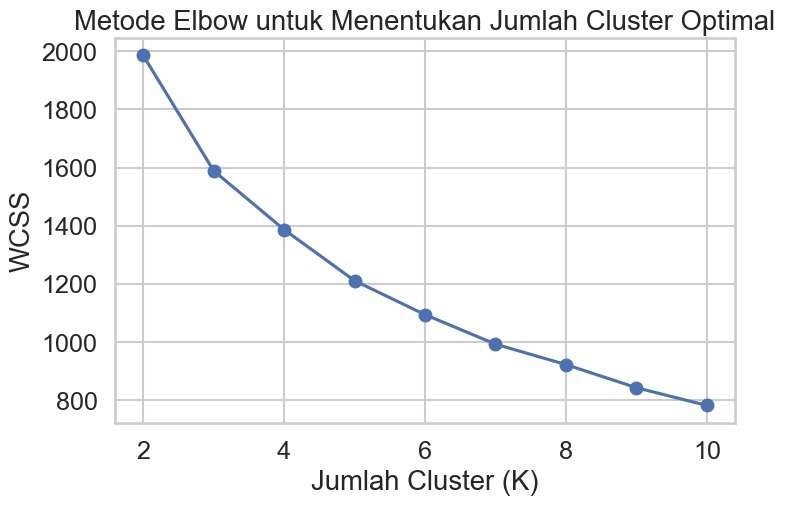

In [180]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Memilih fitur yang akan digunakan untuk clustering
features = ["suhu", "kelembaban", "kecepatan_angin", "total_penyewaan_sepeda"]
X = days_df[features]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster optimal dengan metode Elbow
wcss = []  # Within-Cluster Sum of Squares
K_range = range(2, 11)  # Mencoba jumlah cluster dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS")
plt.title("Metode Elbow untuk Menentukan Jumlah Cluster Optimal")
plt.show()


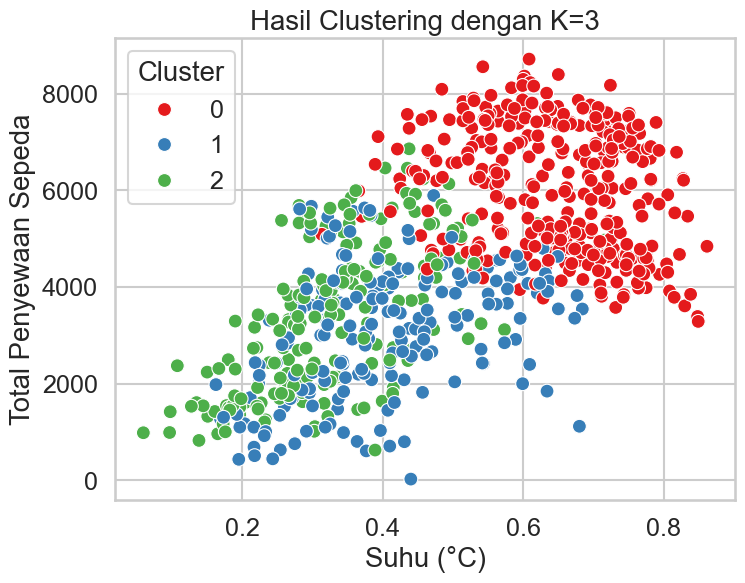

In [ ]:
# Menggunakan K=3 berdasarkan elbow method
optimal_k = 3

# Melatih model K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
days_df["cluster"] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering (menggunakan dua fitur utama: suhu & total penyewaan)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=days_df["suhu"], y=days_df["total_penyewaan_sepeda"], hue=days_df["cluster"], palette="Set1", s=100)
plt.xlabel("Suhu (°C)")
plt.ylabel("Total Penyewaan Sepeda")
plt.title(f"Hasil Clustering dengan K={optimal_k}")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


## Analisis Lanjutan (Opsional)

### Clustering Analisis tanpa menggunakan algoritma ML

### Total Penyewa berdasarkan Musim

In [76]:
# melihat jumlah penyewaan tiap musim berdasarkan penyewa terdaftar dan penyewa kasual
days_df.groupby(by="musim").agg({
    "penyewa_terdaftar": ["sum"],
    "penyewa_kasual": ["sum"]
})

,penyewa_terdaftar,penyewa_kasual
,sum,sum
musim,,
Musim Dingin,711831,129782
Musim Gugur,835038,226091
Musim Panas,715067,203522
Musim Semi,410726,60622


### Total Penyewa berdasarkan hari

In [75]:
# melihat jumlah penyewaan tiap hari berdasarkan penyewa terdaftar dan penyewa kasual
days_df.groupby(by="hari").agg({
    "penyewa_terdaftar": ["sum"],
    "penyewa_kasual": ["sum"]
})

,penyewa_terdaftar,penyewa_kasual
,sum,sum
hari,,
Jumat,409552,78238
Kamis,423935,61460
Minggu,303506,140521
Rabu,415729,57319
Sabtu,323955,153852
Selasa,411266,57843
Senin,384719,70784


In [79]:
# Manual Grouping (Pengelompokan Waktu dalam Sehari)
hours_df["waktu_hari"] = pd.cut(
    hours_df["jam"], bins=[0, 6, 12, 18, 23],
    labels=["Pagi", "Siang", "Sore", "Malam"], include_lowest=True
)

# Binning suhu ke dalam kategori (Mengelompokkan suhu menjadi Dingin (0-0.33), Sedang (0.34-0.66), Panas (0.67-1))
hours_df["kategori_suhu"] = pd.cut(
    hours_df["suhu"], bins=[0, 0.33, 0.66, 1],
    labels=["Dingin", "Sedang", "Panas"], include_lowest=True
)

# Binning total penyewaan sepeda ke dalam kategori
hours_df["kategori_penyewaan"] = pd.qcut(
    hours_df["total_penyewaan_sepeda"], q=3,
    labels=["Rendah", "Sedang", "Tinggi"]
)

# Menampilkan sampel acak dari hasil grouping
hours_df[["jam", "waktu_hari", "suhu", "kategori_suhu", "total_penyewaan_sepeda", "kategori_penyewaan"]].sample(10, random_state=42)



,jam,waktu_hari,suhu,kategori_suhu,total_penyewaan_sepeda,kategori_penyewaan
12830,19,Malam,0.80,Panas,425,Tinggi
8688,20,Malam,0.24,Dingin,88,Sedang
7091,2,Pagi,0.32,Dingin,4,Rendah
12230,19,Malam,0.78,Panas,526,Tinggi
431,0,Pagi,0.26,Dingin,13,Rendah
1086,0,Pagi,0.44,Sedang,32,Rendah
11605,18,Sore,0.72,Panas,706,Tinggi
7983,7,Siang,0.26,Dingin,26,Rendah
10391,2,Pagi,0.50,Sedang,2,Rendah
7046,5,Pagi,0.42,Sedang,21,Rendah


Proses clustering dilakukan dengan Manual Grouping dan Binning. Manual Grouping membagi jam ke dalam kategori Pagi (0-6), Siang (7-12), Sore (13-18), dan Malam (19-23). Binning Suhu mengelompokkan suhu menjadi Dingin (0-0.33), Sedang (0.34-0.66), dan Panas (0.67-1) berdasarkan skala telah dinormalisasi. Binning Penyewaan Sepeda membagi jumlah penyewaan menjadi Rendah, Sedang, dan Tinggi, sehingga setiap kategori memiliki jumlah data yang seimbang.

## Conclusion

**Pertanyaan 1**. Pada saat jam berapa terjadi penyewaan sepeda yang paling banyak dan paling sedikit?

***Jawaban*** : Penyewaan sepeda paling banyak terjadi pada saat jam 17 sementara penyewaan sepeda paling rendah terjadi saat jam 4 dini hari.

**Pertanyaan 2**. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

***Jawaban***: Kondisi cuaca sangat menentukan jumlah penyewaan sepeda. Penyewaan tertinggi terjadi saat cerah atau sedikit berawan, Penyewaan menurun saat berkabut atau berawan serta Penyewaan paling rendah saat kondisi cuaca hujan atau salju.

**Pertanyaan 3**. Bagaimana pola penyewaan sepeda pada hari kerja dibandingkan akhir pekan?

***Jawaban*** : Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan pola penggunaan yang menunjukkan bahwa sepeda sering digunakan untuk keperluan transportasi rutin pada hari kerja, sedangkan pada akhir pekan lebih bersifat fleksibel dan rekreasional.

**Pertanyaan 4**. Bagaimana pola penyewaan sepeda berdasarkan musim?

***Jawaban*** : Penyewaan sepeda paling banyak terjadi pada saat musim gugur, sementara pada saat musim semi menjadi penyewaan sepeda paling sedikit dibandingkan dengan musim lainnya

**Pertanyaan 5**. Bagaimana perbedaan pola penggunaan antara penyewa terdaftar dan penyewa kasual sepanjang tahun?

***Jawaban*** : Penyewa terdaftar memiliki pola penggunaan yang lebih stabil sepanjang tahun, sedangkan penyewa kasual menunjukkan fluktuasi musiman dengan peningkatan signifikan selama bulan-bulan tertentu.

**Pertanyaan 6**. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

***Jawaban*** : Suhu memiliki korelasi positif terhadap penyewaan sepeda (semakin tinggi suhu, semakin banyak penyewaan). Kelembaban memiliki korelasi negatif (kelembaban tinggi menyebabkan penyewaan menurun). Kecepatan angin tidak memiliki dampak yang signifikan. Jadi dapat disimpulkan bahwa suhu faktor suhu sangat berpengaruh terhadap kondisi penyewaan sepeda.